In [2]:
# File: 02_Model_Training.ipynb

# =============================================================================
# PHASE 3: MODEL BUILDING AND TRAINING
# =============================================================================

# --- 1. SETUP ---

# Import essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load our preprocessed data from the file we saved in the previous notebook
df_encoded = pd.read_parquet('processed_data/churn_data_encoded.parquet')


# --- 2. SPLITTING THE DATA ---

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 3. VERIFICATION ---
print("Setup Complete!")
print("Preprocessed data successfully loaded.")
print("-------------------------------------------------")
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)

Setup Complete!
Preprocessed data successfully loaded.
-------------------------------------------------
Shape of training features (X_train): (5634, 30)
Shape of testing features (X_test): (1409, 30)


In [3]:
# --- 4. TRAIN A LOGISTIC REGRESSION MODEL ---

# Import the necessary classes from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Scale the features
# ---------------------------
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the SAME fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


# Step 2: Train the Logistic Regression model
# -------------------------------------------
# Create an instance of the model
# max_iter is increased to ensure the model has enough iterations to converge
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the SCALED training data
log_reg.fit(X_train_scaled, y_train)


# --- 3. VERIFICATION ---
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


--- Logistic Regression Evaluation ---


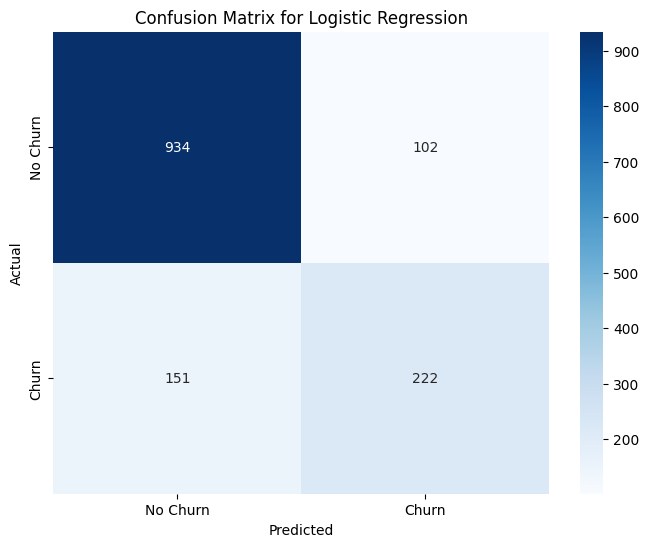

Accuracy: 0.8204


In [4]:
# --- 5. EVALUATE THE LOGISTIC REGRESSION MODEL ---

# Import the necessary evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test data
# -------------------------------------------
y_pred_log_reg = log_reg.predict(X_test_scaled)


# Step 2: Calculate the Confusion Matrix
# ---------------------------------------
print("--- Logistic Regression Evaluation ---")
cm = confusion_matrix(y_test, y_pred_log_reg)

# Visualize the Confusion Matrix for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


# Step 3: Calculate Accuracy
# --------------------------
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy:.4f}")

In [5]:
# Step 4: Generate a detailed Classification Report
# --------------------------------------------------
report = classification_report(y_test, y_pred_log_reg, target_names=['No Churn', 'Churn'])
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.90      0.88      1036
       Churn       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409





--- Random Forest Evaluation ---
Random Forest model trained successfully!
Accuracy: 0.7850

Confusion Matrix:


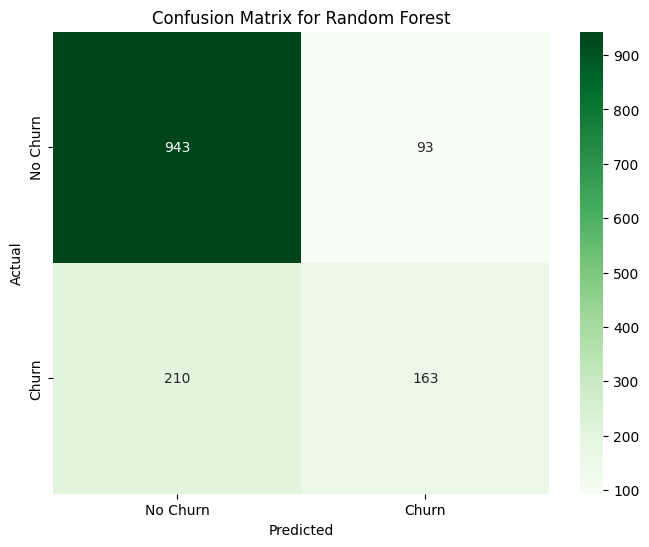


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.91      0.86      1036
       Churn       0.64      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [6]:
# --- 6. TRAIN AND EVALUATE A RANDOM FOREST MODEL ---

# Import the model
from sklearn.ensemble import RandomForestClassifier

print("\n\n--- Random Forest Evaluation ---")

# Step 1: Create and Train the model
# ------------------------------------
# n_estimators is the number of trees in the forest.
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the ORIGINAL (unscaled) training data
rf.fit(X_train, y_train)
print("Random Forest model trained successfully!")


# Step 2: Make predictions on the test data
# -------------------------------------------
y_pred_rf = rf.predict(X_test)


# Step 3: Evaluate the model
# ----------------------------
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Classification Report
print("\nClassification Report:")
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn'])
print(report_rf)

In [7]:
# --- 7. TRAIN AN IMPROVED RANDOM FOREST (WITH CLASS WEIGHTS) ---

print("\n\n--- Improved Random Forest Evaluation (with class_weight='balanced') ---")

# Step 1: Create and Train the model with the new parameter
# -----------------------------------------------------------
# By setting class_weight='balanced', we are telling the model to give more
# weight to the minority class (Churn) during training.
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the original (unscaled) training data
rf_balanced.fit(X_train, y_train)
print("Balanced Random Forest model trained successfully!")


# Step 2: Make predictions and evaluate
# -------------------------------------
y_pred_rf_balanced = rf_balanced.predict(X_test)

# Accuracy
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
print(f"Accuracy: {accuracy_rf_balanced:.4f}")

# Classification Report
print("\nClassification Report:")
report_rf_balanced = classification_report(y_test, y_pred_rf_balanced, target_names=['No Churn', 'Churn'])
print(report_rf_balanced)



--- Improved Random Forest Evaluation (with class_weight='balanced') ---
Balanced Random Forest model trained successfully!
Accuracy: 0.7942

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.92      0.87      1036
       Churn       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [8]:
# --- 8. HYPERPARAMETER TUNING THE RANDOM FOREST ---
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

print("\n\n--- Hyperparameter Tuning Random Forest ---")

# Step 1: Define the Hyperparameter Grid
# ----------------------------------------
# We are defining a 'search space' for RandomizedSearchCV to explore.
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
    'class_weight': ['balanced', None]     # Whether to use class weights
}

# Step 2: Set up RandomizedSearchCV
# ---------------------------------
# We are creating a search object. It will try 50 different combinations of
# the parameters above, using 5-fold cross-validation for each.
# n_jobs=-1 uses all available CPU cores to speed up the process.
rf_for_tuning = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_for_tuning,
                                   param_distributions=param_grid,
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   cv=5,       # 5-fold cross-validation
                                   verbose=2,  # Shows progress
                                   random_state=42,
                                   n_jobs=-1)

# Step 3: Run the search
# ----------------------
# This is the part that will take a few minutes.
print("Starting the search for the best hyperparameters...")
random_search.fit(X_train, y_train)
print("Search complete!")

# Step 4: Get the best model and evaluate it
# ------------------------------------------
print("\nBest parameters found:", random_search.best_params_)

# Use the best estimator found by the search
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Final Evaluation
print("\n--- Tuned Random Forest - Final Evaluation ---")
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy: {accuracy_best_rf:.4f}")

print("\nClassification Report:")
report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=['No Churn', 'Churn'])
print(report_best_rf)



--- Hyperparameter Tuning Random Forest ---
Starting the search for the best hyperparameters...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Search complete!

Best parameters found: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'class_weight': None}

--- Tuned Random Forest - Final Evaluation ---
Accuracy: 0.8126

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.92      0.88      1036
       Churn       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [9]:
# --- 10. SAVE THE WINNING MODEL AND THE SCALER ---
import joblib

print("\n--- Saving the final model and scaler ---")

# Create a directory to save the final model assets
import os
os.makedirs('production_model', exist_ok=True)

# Save the Logistic Regression model
joblib.dump(log_reg, 'production_model/churn_model.joblib')

# Save the scaler
joblib.dump(scaler, 'production_model/scaler.joblib')

print("Model and scaler saved successfully in the 'production_model' directory.")


--- Saving the final model and scaler ---
Model and scaler saved successfully in the 'production_model' directory.
